<a href="https://colab.research.google.com/github/narayanvyas/machine_learning_basics/blob/master/Elbow_Method_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Credit Card Customer Data.csv')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
# Check for missing values
missing_data = data.isnull().sum()
print(missing_data)

# Drop non-numeric columns
numerical_data = data.select_dtypes(include=[np.number])

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


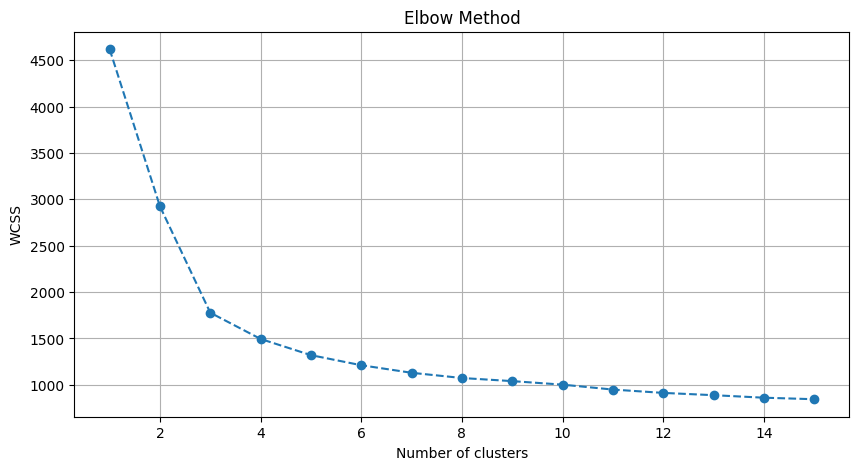

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Let's check for up to 15 clusters to get a clearer view of where the elbow might be
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

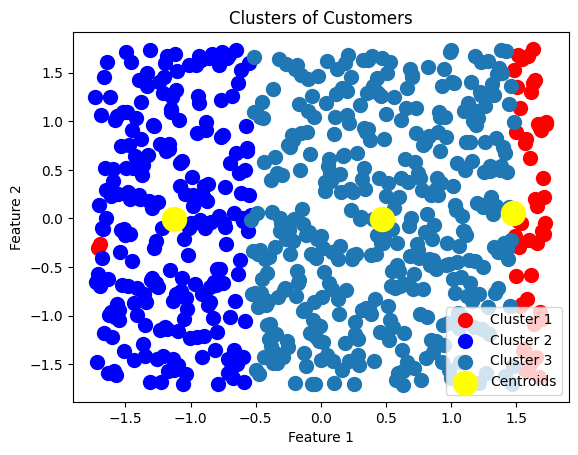

In [ ]:
# Assuming optimal_clusters is the number of clusters you've determined from the elbow method
optimal_clusters = 3  # Replace with the number you deduced

# Initializing and fitting the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clustered_data = kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the original dataset
data['Cluster'] = clustered_data

# If you want to visualize the clusters and your data has more than two dimensions,
# you'll need to reduce dimensions (using PCA, t-SNE, etc.) or choose specific dimensions to plot.
# For simplicity, let's assume you want to plot the 1st and 2nd columns of your scaled data:

# Visualizing the clusters
plt.scatter(scaled_data[clustered_data == 0, 0], scaled_data[clustered_data == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_data[clustered_data == 1, 0], scaled_data[clustered_data == 1, 1], s=100, c='blue', label='Cluster 2')
if optimal_clusters > 2:
    for i in range(2, optimal_clusters):
        plt.scatter(scaled_data[clustered_data == i, 0], scaled_data[clustered_data == i, 1], s=100, label=f'Cluster {i + 1}')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Feature 1')  # Replace with the actual feature name
plt.ylabel('Feature 2')  # Replace with the actual feature name
plt.legend()
plt.show()